## Complex NN Architecture using Functional API

In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# %matplotlib inline

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

print(housing.feature_names)

from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, test_size = 0.2, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.3, random_state=42)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)
tf.random.set_seed(42)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [2]:
## clears previous keras sessaions (if any)
tf.keras.backend.clear_session()

####  The difference between Sequnetial and Functional can be depicted in the image below
<img src='Functional_API.png'>

#### Create the model architecture

##### 2. Functional APIs of Keras

In [3]:
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
hidden1 = tf.keras.layers.Dense(30, activation='relu')(input_)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([input_, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model_functional = tf.keras.models.Model(inputs=[input_], outputs=[output])

In [4]:
model_functional.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

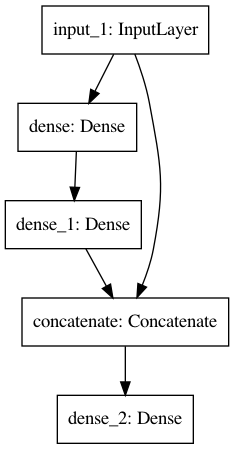

In [5]:
import pydot
tf.keras.utils.plot_model(model_functional)

In [6]:
model_functional.compile(loss='mse',
                         optimizer=tf.keras.optimizers.SGD(lr=1e-3),
                        metrics=['mae'])

In [7]:
weights, biases = model_functional.layers[1].get_weights()
weights.shape

(8, 30)

In [8]:
biases.shape

(30,)

In [9]:
model_history = model_functional.fit(X_train, y_train, epochs=40,
                                     validation_data=(X_valid, y_valid))

Epoch 1/40
362/362 [==============================] - 0s 888us/step - loss: 1.2605 - mae: 0.7982 - val_loss: 0.7210 - val_mae: 0.6104
Epoch 2/40
362/362 [==============================] - 0s 582us/step - loss: 0.6456 - mae: 0.5819 - val_loss: 0.6469 - val_mae: 0.5727
Epoch 3/40
362/362 [==============================] - 0s 591us/step - loss: 0.6041 - mae: 0.5605 - val_loss: 0.6127 - val_mae: 0.5564
Epoch 4/40
362/362 [==============================] - 0s 590us/step - loss: 0.5759 - mae: 0.5465 - val_loss: 0.5814 - val_mae: 0.5418
Epoch 5/40
362/362 [==============================] - 0s 587us/step - loss: 0.5538 - mae: 0.5349 - val_loss: 0.5646 - val_mae: 0.5332
Epoch 6/40
362/362 [==============================] - 0s 593us/step - loss: 0.5369 - mae: 0.5259 - val_loss: 0.5500 - val_mae: 0.5272
Epoch 7/40
362/362 [==============================] - 0s 579us/step - loss: 0.5206 - mae: 0.5189 - val_loss: 0.5288 - val_mae: 0.5141
Epoch 8/40
362/362 [==============================] - 0s 575us

In [10]:
mae_test = model_functional.evaluate(X_test, y_test)

129/129 [==============================] - 0s 700us/step - loss: 0.4021 - mae: 0.4493


In [11]:
model_history.history

{'loss': [1.2604637145996094,
  0.6456487774848938,
  0.6041222810745239,
  0.5758933424949646,
  0.5537684559822083,
  0.5368854999542236,
  0.5206161737442017,
  0.5084012150764465,
  0.49755191802978516,
  0.48730671405792236,
  0.4787062108516693,
  0.4710164964199066,
  0.4637923240661621,
  0.45768386125564575,
  0.4521256983280182,
  0.44717833399772644,
  0.4424114227294922,
  0.43842458724975586,
  0.4346226155757904,
  0.43152445554733276,
  0.4275631010532379,
  0.4249744713306427,
  0.4222968816757202,
  0.419508695602417,
  0.41673076152801514,
  0.4144132733345032,
  0.41206294298171997,
  0.40979382395744324,
  0.40761783719062805,
  0.4053756594657898,
  0.403368204832077,
  0.40155014395713806,
  0.3998430669307709,
  0.39808592200279236,
  0.3963729739189148,
  0.3944888710975647,
  0.3930697441101074,
  0.39156320691108704,
  0.39010849595069885,
  0.38855642080307007],
 'mae': [0.7981808185577393,
  0.5819327235221863,
  0.5604757070541382,
  0.5465379357337952,
  0

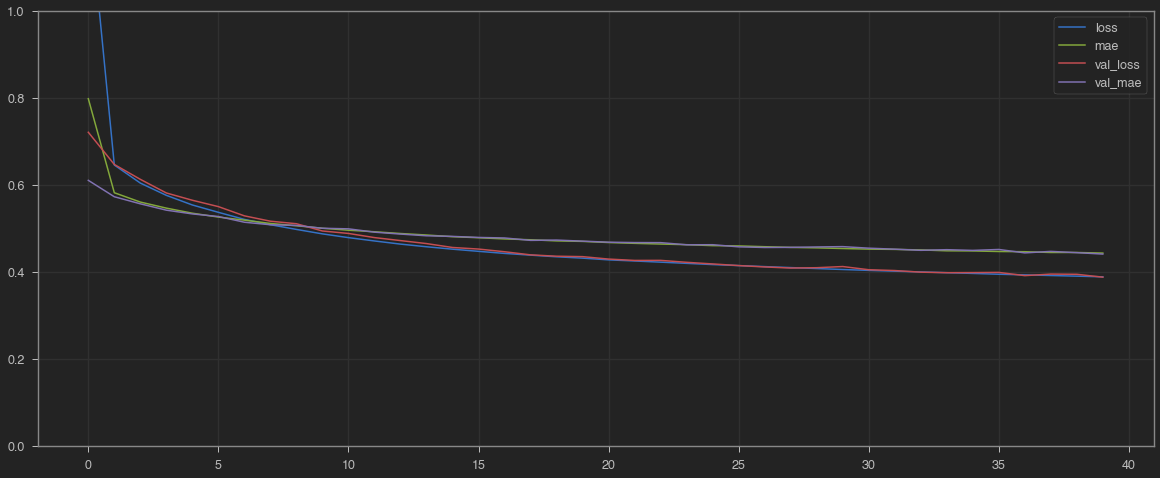

In [15]:
dfp = pd.DataFrame(model_history.history).plot(figsize=(20,8))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

As we can see the loss function can be further reduced

In [16]:
model_history = model_functional.fit(X_train, y_train, epochs=40,
                                     validation_data=(X_valid, y_valid))
mae_test = model_functional.evaluate(X_test, y_test)

Epoch 1/40
362/362 [==============================] - 0s 653us/step - loss: 0.3872 - mae: 0.4418 - val_loss: 0.3869 - val_mae: 0.4426
Epoch 2/40
362/362 [==============================] - 0s 585us/step - loss: 0.3857 - mae: 0.4416 - val_loss: 0.3853 - val_mae: 0.4399
Epoch 3/40
362/362 [==============================] - 0s 597us/step - loss: 0.3846 - mae: 0.4408 - val_loss: 0.3873 - val_mae: 0.4397
Epoch 4/40
362/362 [==============================] - 0s 591us/step - loss: 0.3830 - mae: 0.4392 - val_loss: 0.3834 - val_mae: 0.4380
Epoch 5/40
362/362 [==============================] - 0s 597us/step - loss: 0.3817 - mae: 0.4388 - val_loss: 0.3838 - val_mae: 0.4391
Epoch 6/40
362/362 [==============================] - 0s 614us/step - loss: 0.3809 - mae: 0.4376 - val_loss: 0.3834 - val_mae: 0.4401
Epoch 7/40
362/362 [==============================] - 0s 607us/step - loss: 0.3790 - mae: 0.4373 - val_loss: 0.3784 - val_mae: 0.4337
Epoch 8/40
362/362 [==============================] - 0s 607us

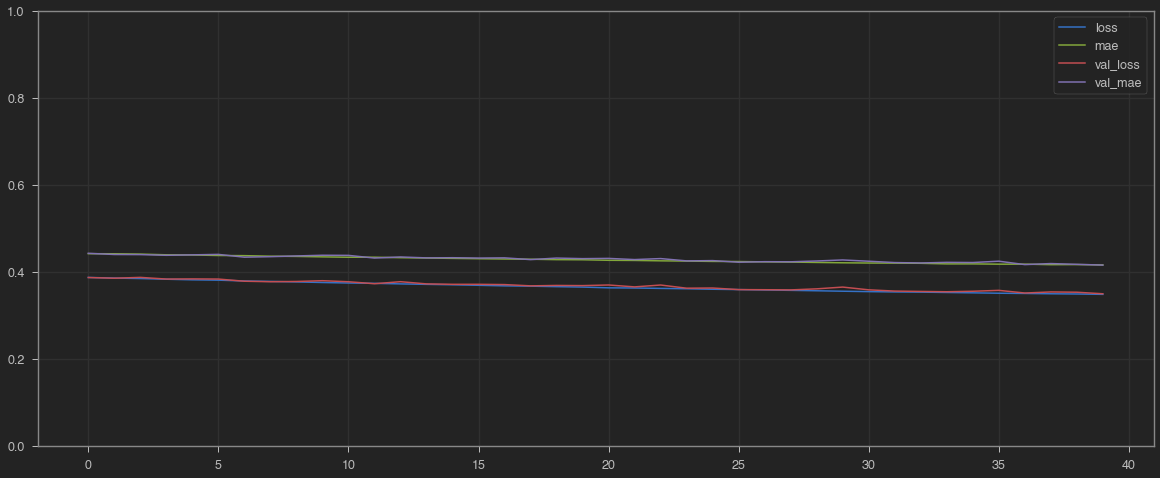

In [17]:
dfp = pd.DataFrame(model_history.history).plot(figsize=(20,8))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()